# Reproduction

Make sure you have downloaded the environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import scipy
from scipy import stats
import subprocess
import sys
from plot_utils import *

!conda install --yes pandas

Solving environment: done

# All requested packages already installed.



# Training the model
Training the CIFAR100 model for 50 epochs with 10% of the data. We provide a download for the pretrained model on our GitHub and strongly recommend downloading that checkpoint.

In [2]:
def train_model(arch, data, epochs, tiny, aug_list=None):
    tiny_str = ''
    if tiny:
        tiny_str = 'tiny_'
    if aug_list != None:
        mode = 'aug'
    else:
        mode = 'normal'
        aug_list = '[]'

    # Train model if model does not exist.
    if not os.path.exists(f'checkpoints/{tiny_str}data_{data}_arch_{arch}_mode_{mode}_auglist_{aug_list}_rlabel_False/{arch}_{str(epochs)}.pth'):
        p = subprocess.Popen(['python', 'benchmark/cifar100_train.py', '--arch', arch, '--data', data, '--epochs', str(epochs), '--tiny', str(tiny)], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        output, err = p.communicate()
        rc = p.returncode

In [3]:
arch = 'ResNet20-4'
data = 'cifar100'
epochs = 50
tiny = True

train_model(arch, data, epochs, tiny)

# Running the search algorithm on the tiny data

In [4]:
# Generate bash file for search
with open('batch_generate.sh', 'w') as output:
    p = subprocess.Popen(['python', 'searchalg/batch_generate.py', '--arch', 'ResNet20-4', '--data', 'cifar100'], stdout=output, stderr=subprocess.PIPE)

Usually you would run the complete 'batch_generate.sh' bash file. We will show the output of the first line.

In [7]:
p = subprocess.Popen(['python', 'benchmark/search_transform_attack.py', '--aug_list', '27-13-43', '--mode', 'aug', '--arch', 'ResNet20-4', '--data', 'cifar100', '--epochs', '50'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
output, err = p.communicate()
rc = p.returncode

print(output)
print(err)

b'Currently evaluating -------------------------------:\nFriday, 04. February 2022 06:35PM\nCPUs: 4, GPUs: 1 on Dorian-HP-Laptop.\nGPU : NVIDIA GeForce GTX 1050\nFiles already downloaded and verified\nFiles already downloaded and verified\nFiles already downloaded and verified\nFiles already downloaded and verified\nPolicy list: [27, 13, 43]\n[RandomCrop(size=(32, 32), padding=4), RandomHorizontalFlip(p=0.5), <benchmark.comm.sub_transform object at 0x7fe6a135c250>]\nattach 0th in 27-13-43, metric 0.458394580955456\nattach 1th in 27-13-43, metric 0.24235344503171707\nattach 2th in 27-13-43, metric 0.2774584198559583\nattach 3th in 27-13-43, metric 0.40773353044946603\nattach 4th in 27-13-43, metric 0.45979178541644405\nattach 5th in 27-13-43, metric 0.27529550511342954\nattach 6th in 27-13-43, metric 0.2535310336796101\nattach 7th in 27-13-43, metric 0.7019993210469302\nattach 8th in 27-13-43, metric 0.17212095860474688\nattach 9th in 27-13-43, metric 0.21569513167170676\nattach 10th in

# Figure 1

The data below was obtained by running the code in the following cell and copying the resulting arrays. Sorry for not loading this from files.

In [8]:
arch = 'ResNet20-4'
data = 'cifar100'
epochs = 50
aug_list = '3-1-7'

p = subprocess.Popen(['python', 'benchmark/gradsim.py', '--aug_list', aug_list, '--mode', 'aug', '--arch', arch, '--data', data, '--epochs', str(epochs)], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
output, err = p.communicate()
rc = p.returncode

print(output)
print(err)

b'Currently evaluating -------------------------------:\nFriday, 04. February 2022 06:36PM\nCPUs: 4, GPUs: 1 on Dorian-HP-Laptop.\nGPU : NVIDIA GeForce GTX 1050\nFiles already downloaded and verified\nFiles already downloaded and verified\nFiles already downloaded and verified\nFiles already downloaded and verified\nPolicy list: [3, 1, 7]\n[RandomCrop(size=(32, 32), padding=4), RandomHorizontalFlip(p=0.5), <benchmark.comm.sub_transform object at 0x7fe0ee5cff70>]\n'
b'Traceback (most recent call last):\n  File "benchmark/gradsim.py", line 141, in <module>\n    main()\n  File "benchmark/gradsim.py", line 130, in main\n    model.load_state_dict(torch.load(\'checkpoints/tiny_data_{}_arch_{}/{}.pth\'.format(opt.data, opt.arch, opt.epochs)))\n  File "/home/dorian/Programs/miniconda3/envs/ats/lib/python3.8/site-packages/torch/serialization.py", line 525, in load\n    with _open_file_like(f, \'rb\') as opened_file:\n  File "/home/dorian/Programs/miniconda3/envs/ats/lib/python3.8/site-packages/

In [9]:
# This data should load from files/run directly

dw_aug = [0.04744644406018779, 0.039027749116604143, 0.029665209582218757, 0.029589476608313046, 0.029517313150259166, 0.026542305946350098, 0.03172630318082296, 0.020711871236562727, 0.02059033060303101, 0.02627802095734156, 0.03483908611994523, 0.04670570805095709, 0.08143566766610512, 0.11464190665238465, 0.13565088065090375, 0.1823455205330482, 0.26511132505077584, 0.37657010073845204, 0.3931077376581155, 0.7204586505889893, 0.9999999981660109]
dw_normal = [0.09486940182082784, 0.0961493368430708, 0.09595300853968813, 0.10746482257516338, 0.11041859299875796, 0.0991823159570161, 0.1106825332264774, 0.12085817859042436, 0.13703049505845857, 0.14590068261067454, 0.17625755586016637, 0.16057654940165006, 0.17775514016930874, 0.2848670082453352, 0.49946261369265044, 0.6382497943364657, 0.7594447612762452, 0.8772309505022489, 0.9628078424013577, 0.9882352113723755, 1.0000000073359563]

['0/20', '5/20', '10/20', '15/20', '20/20']


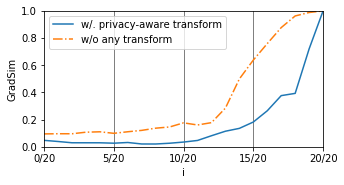

In [10]:
x_axis = [f"{i}/20" for i in range(0, 21, 5)]
print(x_axis)

plt.rcParams["figure.figsize"] = (5,2.5)
plt.axvline(x=5, color="gray", lw=1)
plt.axvline(x=10, color="gray", lw=1)
plt.axvline(x=15, color="gray", lw=1)
plt.plot(dw_aug, label="w/. privacy-aware transform")
plt.plot(dw_normal, linestyle='-.', label="w/o any transform")
plt.legend()
plt.xlabel("i")
plt.ylabel("GradSim")
plt.xticks(np.arange(0, 21, 5), x_axis)
plt.xlim(0, 20)
plt.ylim(0, 1)



plt.show()

# Figure 2

For figure 2 of the paper, we need to calculate the PSNR and Spri of 100 random policies. We will show you how to get the PSNR value for one policy and then plot the figure with the data from our own run. Spri is calculated the same way as the second cell under 'Running the search algorithm on the tiny data'

In [11]:
# Calculate PSNR

p = subprocess.Popen(['python', 'benchmark/search_transform_attack.py', '--aug_list', '27-13-43', '--mode', 'aug', '--arch', 'ResNet20-4', '--data', 'cifar100', '--epochs', '50'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
output, err = p.communicate()
rc = p.returncode

print(output)
print(err)

b'Currently evaluating -------------------------------:\nFriday, 04. February 2022 06:36PM\nCPUs: 4, GPUs: 1 on Dorian-HP-Laptop.\nGPU : NVIDIA GeForce GTX 1050\nFiles already downloaded and verified\nFiles already downloaded and verified\nFiles already downloaded and verified\nFiles already downloaded and verified\nPolicy list: [27, 13, 43]\n[RandomCrop(size=(32, 32), padding=4), RandomHorizontalFlip(p=0.5), <benchmark.comm.sub_transform object at 0x7f6c480d2250>]\nattach 0th in 27-13-43, metric 0.4583945786016277\nattach 1th in 27-13-43, metric 0.24235444621858943\nattach 2th in 27-13-43, metric 0.27745820587348136\nattach 3th in 27-13-43, metric 0.40773349717402685\nattach 4th in 27-13-43, metric 0.4597918787321005\nattach 5th in 27-13-43, metric 0.27529612677633014\nattach 6th in 27-13-43, metric 0.25353100905508313\nattach 7th in 27-13-43, metric 0.702000574552669\nattach 8th in 27-13-43, metric 0.1721208658895921\nattach 9th in 27-13-43, metric 0.2156951536669714\nattach 10th in 

MAKE SURE THIS IS GONNA BE SAVED TO THE RIGHT FOLDER!

In [24]:
base_dir = "psnr/"

directories = [os.path.join(base_dir, o) for o in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, o))]

PSNR = []
Spri = []

for dir in directories:
    aug = dir.split("_")[-3]
    
    file_name = aug + "_test_psnr.npy"
    PSNR.append(np.load(os.path.join(dir, file_name), allow_pickle=True))
    Spri.append(np.mean(np.load(f"search/tiny_data_cifar100_arch_ResNet20-4_mode_normal_auglist_[]_rlabel_False/{aug}.npy")))

PSNR = np.array(PSNR)
Spri = np.array(Spri)


print(len(PSNR))
print(len(Spri))

100
100


(0.23490828540197412, 0.018644178064417056)


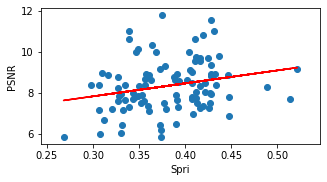

In [13]:
plt.scatter(Spri, PSNR)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Spri, PSNR)
print(scipy.stats.pearsonr(Spri, PSNR))

plt.rcParams["figure.figsize"] = (5,2.5)
plt.plot(Spri, intercept + slope * Spri, 'r')
plt.xlabel('Spri')
plt.ylabel('PSNR')
plt.show()

# Figure 3

The stats for figure 3 are automatically saved when training a model. To train the model for yourself, the train_model() function can be used.

In [14]:
stats = np.load('training/ResNet20-4_200_[]/stats.npy', allow_pickle=True)
stats_hybrid = np.load('training/ResNet20-4_200_3-1-7+43-18-18/stats.npy', allow_pickle=True)

train_losses = stats.item()['train_losses']
train_accuracy = stats.item()['train_Accuracy']
valid_losses = stats.item()['valid_losses']
valid_accuracy = stats.item()['valid_Accuracy']

train_losses_hybrid = stats_hybrid.item()['train_losses']
train_accuracy_hybrid = stats_hybrid.item()['train_Accuracy']
valid_losses_hybrid = stats_hybrid.item()['valid_losses']
valid_accuracy_hybrid = stats_hybrid.item()['valid_Accuracy']


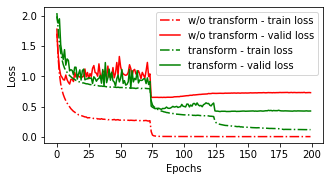

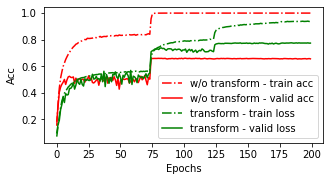

In [15]:
epochs = np.arange(0, 200)

plt.plot(epochs, train_losses, linestyle="-.", color="red", label="w/o transform - train loss")
plt.plot(epochs, valid_losses, color="red", label="w/o transform - valid loss")
plt.plot(epochs, train_losses_hybrid, linestyle="-.", color="green", label="transform - train loss")
plt.plot(epochs, valid_losses_hybrid, color="green", label="transform - valid loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

plt.plot(epochs, train_accuracy, linestyle="-.", color="red", label="w/o transform - train acc")
plt.plot(epochs, valid_accuracy, color="red", label="w/o transform - valid acc")
plt.plot(epochs, train_accuracy_hybrid, linestyle="-.", color="green", label="transform - train loss")
plt.plot(epochs, valid_accuracy_hybrid, color="green", label="transform - valid loss")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()

# Figure 4

The images in figure 4 are generated by running an attack on a model that was trained on the full data for 200 epochs with augmentations. This has to be done for 8 models and takes a long time.

The training can be done with the commented function below, changing the arguments for different architectures and datasets, but we do not need to run this for this notebook.

We have provided code to perform an attack on one image, but this can still take 10 minutes or more depending on your system. The model checkpoint should also be downloaded from the GitHub for this.

In [16]:
arch = 'ResNet20-4'
data = 'cifar100'
epochs = 200
tiny = False
aug_list = '3-1-7+43-18-18'

# train_model(arch, data, epochs, tiny, aug_list)

# As an example, we run an attack on one image.
# This can take a while, feel free to skip.
p = subprocess.Popen(['python', 'benchmark/cifar100_attack.py', '--aug_list', aug_list, '--optim', 'inversed', '--mode', 'aug', '--arch', arch, '--data', data, '--epochs', str(epochs), '--num_attacks', '1', '--rlabel', 'True'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
output, err = p.communicate()
rc = p.returncode

print(output)
print(err)

b''
b'usage: cifar100_attack.py [-h] --aug_list AUG_LIST --optim OPTIM --mode MODE\n                          [--rlabel RLABEL] --arch ARCH --data DATA --epochs\n                          EPOCHS [--resume RESUME]\ncifar100_attack.py: error: unrecognized arguments: --num_attacks 1\n'


In [17]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

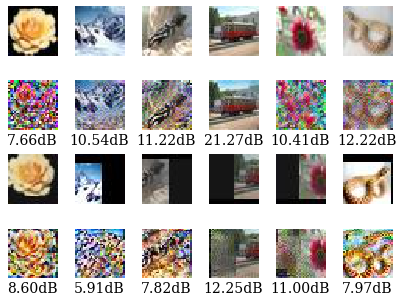

In [18]:
path1 = 'benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_normal_auglist__rlabel_True/'
path2 = 'benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_3-1-7+43-18-18_rlabel_True/'
path3 = 'benchmark/images/data_cifar100_arch_ConvNet_epoch_200_optim_inversed_mode_normal_auglist__rlabel_True/'
path4 = 'benchmark/images/data_cifar100_arch_ConvNet_epoch_200_optim_inversed_mode_aug_auglist_3-1-7+43-18-18_rlabel_True/'

numbers = [21, 22, 98, 13, 68, 82, 21, 22, 98, 13, 68, 82 ]

f, axarr = plt.subplots(4, 6, figsize=(14, 5))
x = 0
y = 0
for number in numbers:
    if y <= 2 and x == 0:
        path = path1
    elif y <= 2 and x == 2:
        path = path2
    elif y >= 3 and x == 0:
        path = path3
    else:
        path = path4
        
    img1 = plt.imread(path+'ori_'+str(number)+'.jpg').astype('float')
    img2 = plt.imread(path+'rec_'+str(number)+'.jpg').astype('float')
    psnr = PSNR(img1, img2)

    img1 = plt.imread(path+'ori_'+str(number)+'.jpg')
    img2 = plt.imread(path+'rec_'+str(number)+'.jpg')
    
    axarr[x, y].imshow(img1)
    axarr[x, y].axis('off')
    axarr[x+1, y].imshow(img2)
    axarr[x+1, y].axis('off')
    axarr[x+1,y].set_title('{:.2f}'.format(psnr) + "dB", y=-0.4, fontsize=14, family='serif')
    y+=1
    if y == 6:
        y = 0
        x = 2
f.subplots_adjust(hspace=.5, wspace=-0.85)
plt.show()

    

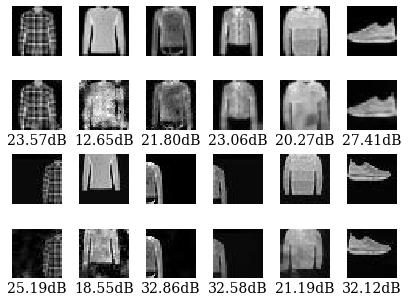

In [19]:
path1 = 'benchmark/images/data_FashionMinist_arch_ResNet20-4_epoch_200_optim_inversed_mode_normal_auglist__rlabel_True/'
path2 = 'benchmark/images/data_FashionMinist_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_3-1-7+43-18-18_rlabel_True/'
path3 = 'benchmark/images/data_FashionMinist_arch_ConvNet_epoch_200_optim_inversed_mode_normal_auglist__rlabel_True/'
path4 = 'benchmark/images/data_FashionMinist_arch_ConvNet_epoch_200_optim_inversed_mode_aug_auglist_3-1-7+43-18-18_rlabel_True/'

numbers = [8, 56, 17, 11, 21, 62, 8, 56, 17, 11, 21, 62 ]

f, axarr = plt.subplots(4, 6, figsize=(14,5))
x = 0
y = 0
for number in numbers:
    if y <= 2 and x == 0:
        path = path1
    elif y <= 2 and x == 2:
        path = path2
    elif y >= 3 and x == 0:
        path = path3
    else:
        path = path4
    img1 = plt.imread(path+'ori_'+str(number)+'.jpg').astype('float')
    img2 = plt.imread(path+'rec_'+str(number)+'.jpg').astype('float')
    psnr = PSNR(img1, img2)

    img1 = plt.imread(path+'ori_'+str(number)+'.jpg')
    img2 = plt.imread(path+'rec_'+str(number)+'.jpg')
    
    axarr[x, y].imshow(img1)
    axarr[x, y].axis('off')
    axarr[x+1, y].imshow(img2)
    axarr[x+1, y].axis('off')
    axarr[x+1,y].set_title('{:.2f}'.format(psnr) + "dB", y=-0.4, fontsize=14, family='serif')
    y+=1
    if y == 6:
        y = 0
        x = 2
f.subplots_adjust(hspace=.5, wspace=-0.85)
plt.show()

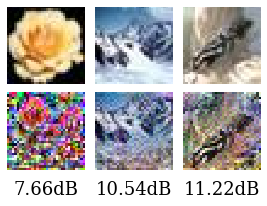

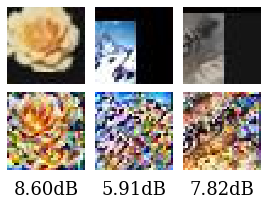

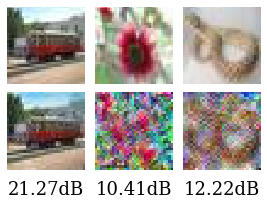

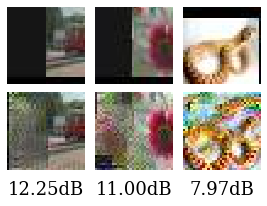

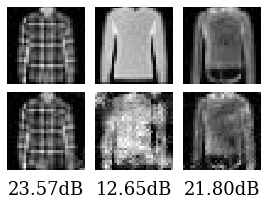

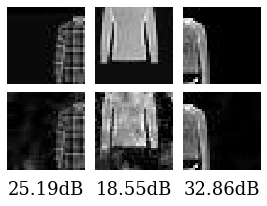

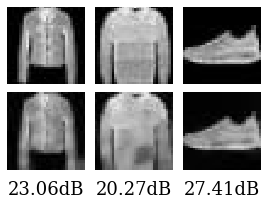

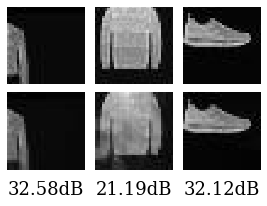

In [20]:
path1 = 'benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_normal_auglist__rlabel_True/'
path2 = 'benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_3-1-7+43-18-18_rlabel_True/'
path3 = 'benchmark/images/data_cifar100_arch_ConvNet_epoch_200_optim_inversed_mode_normal_auglist__rlabel_True/'
path4 = 'benchmark/images/data_cifar100_arch_ConvNet_epoch_200_optim_inversed_mode_aug_auglist_3-1-7+43-18-18_rlabel_True/'
path5 = 'benchmark/images/data_FashionMinist_arch_ResNet20-4_epoch_200_optim_inversed_mode_normal_auglist__rlabel_True/'
path6 = 'benchmark/images/data_FashionMinist_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_3-1-7+43-18-18_rlabel_True/'
path7 = 'benchmark/images/data_FashionMinist_arch_ConvNet_epoch_200_optim_inversed_mode_normal_auglist__rlabel_True/'
path8 = 'benchmark/images/data_FashionMinist_arch_ConvNet_epoch_200_optim_inversed_mode_aug_auglist_3-1-7+43-18-18_rlabel_True/'

paths = [path1, path2, path3, path4, path5, path6, path7, path8]
plots = [[21, 22, 98],[21, 22, 98], [13, 68, 82], [13, 68, 82], 
         [8, 56, 17], [8, 56, 17], [11, 21, 62], [11, 21, 62]]
counter = 0
for numbers in plots:
    f, axarr = plt.subplots(2, 3, figsize=(10, 3))
    x = 0
    y = 0
    for number in numbers:
        img1 = plt.imread(paths[counter]+'ori_'+str(number)+'.jpg').astype('float')
        img2 = plt.imread(paths[counter]+'rec_'+str(number)+'.jpg').astype('float')
        psnr = PSNR(img1, img2)

        img1 = plt.imread(paths[counter]+'ori_'+str(number)+'.jpg')
        img2 = plt.imread(paths[counter]+'rec_'+str(number)+'.jpg')

        axarr[x, y].imshow(img1)
        axarr[x, y].axis('off')
        axarr[x+1, y].imshow(img2)
        axarr[x+1, y].axis('off')
        axarr[x+1, y].set_title('{:.2f}'.format(psnr) + "dB", y=-0.4, fontsize=18, family='serif')
                
        y+=1
        
    f.subplots_adjust(hspace=.1, wspace=-0.77)
    plt.show()
    counter += 1

# Figure 5

============ Available files for k = 1 ============
 0. k1_papermodel_e50_data_cifar100_arch_ResNet20-4
 1. k1_ownmodel_e100_data_cifar100_arch_ResNet20-4
 2. k1_ownmodel_e50_data_cifar100_arch_ResNet20-4
 3. k1_ownmodel_e200_data_cifar100_arch_ResNet20-4
 Filename : k1/k1_ownmodel_e100_data_cifar100_arch_ResNet20-4
 Policies : 50


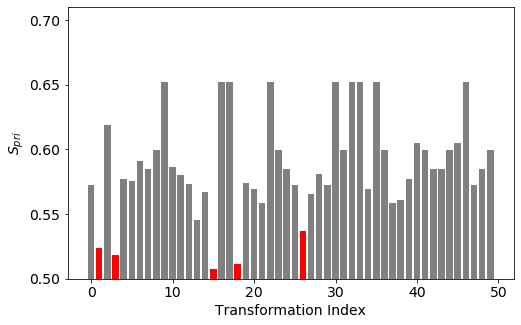

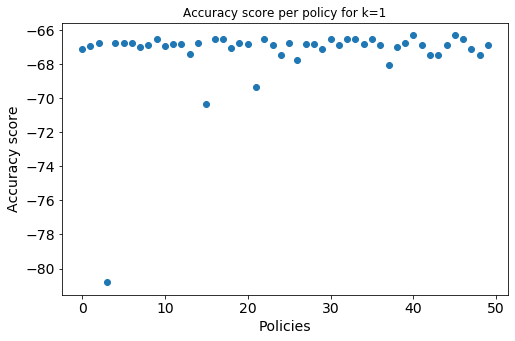

15
18
3
1
26


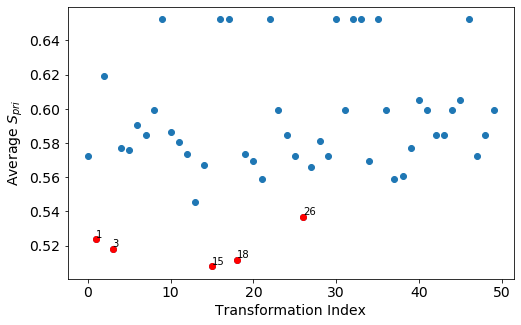

============ Available files for k = 2 ============
 0. k2_ownmodel_data_cifar100_arch_ResNet20-4
 1. k2_papermodel_data_cifar100_arch_ResNet20-4
 Filename : k2/k2_papermodel_data_cifar100_arch_ResNet20-4
 Policies : 2428


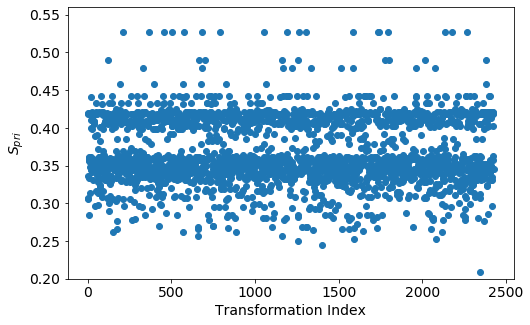

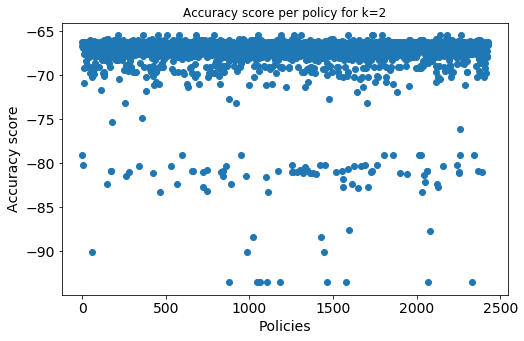

3
15
18
26
1


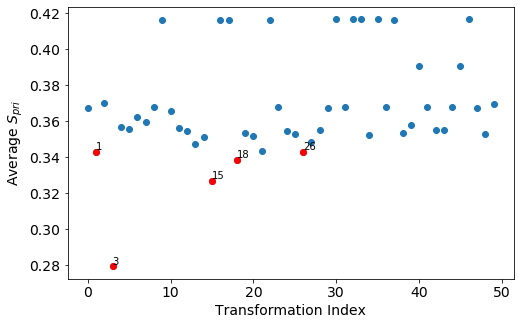

============ Available files for k = 3 ============
 0. k3_papermodel_data_cifar100_arch_ResNet20-4
 1. k3_ownmodel_data_cifar100_arch_ResNet20-4
 Filename : k3/k3_ownmodel_data_cifar100_arch_ResNet20-4
 Policies : 1416


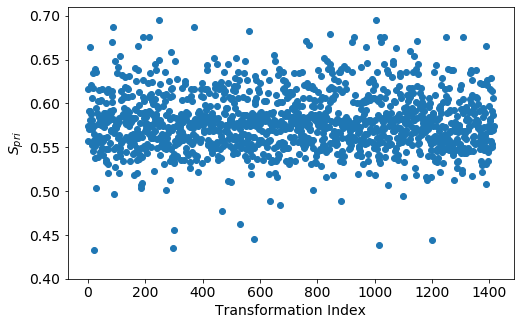

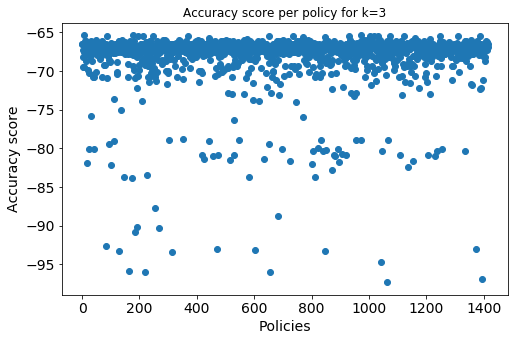

1
15
18
5
26


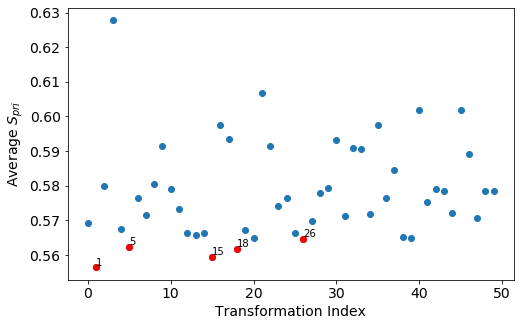

In [25]:
for k in range(1, 4):
    file_names = show_files(k)

    # Choose which file you want from the printed list
    file_number = 1

    accuracy, spri = preprocess_data(*load_data(f'k{k}/{file_names[file_number]}'))

    plot_spri(k, spri, debug=False)
    plot_accuracy(k, accuracy, debug=False)
    count_importance(spri)


# Figure 6

In the cell below code is provided to run the whole attack for yourself. The cell can be skipped, the cell after loads the saved data.

In [26]:
arch = 'ResNet20-4'
data = 'cifar100'
epochs = 50
aug_list = '3-1-7'

p = subprocess.Popen(['python', 'benchmark/layer_grads.py', '--aug_list', aug_list, '--optim', 'inversed', '--mode', 'aug', '--arch', arch, '--data', data, '--epochs', str(epochs), '--file_name', 'figure_6_3-1-7'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
output, err = p.communicate()
rc = p.returncode

print(output)
print(err)

b"Namespace(arch='ResNet20-4', aug_list='3-1-7', data='cifar100', epochs=50, file_name='figure_6_3-1-7', mode='aug', optim='inversed', resume=0, rlabel=False)\nCurrently evaluating -------------------------------:\nFriday, 04. February 2022 06:39PM\nCPUs: 4, GPUs: 1 on Dorian-HP-Laptop.\nGPU : NVIDIA GeForce GTX 1050\ninversed\nNamespace(arch='ResNet20-4', aug_list='3-1-7', data='cifar100', epochs=50, file_name='figure_6_3-1-7', mode='aug', optim='inversed', resume=0, rlabel=False)\nFiles already downloaded and verified\nFiles already downloaded and verified\nFiles already downloaded and verified\nFiles already downloaded and verified\nPolicy list: [3, 1, 7]\n[RandomCrop(size=(32, 32), padding=4), RandomHorizontalFlip(p=0.5), <benchmark.comm.sub_transform object at 0x7fe6b823ea90>]\n"
b'Traceback (most recent call last):\n  File "benchmark/layer_grads.py", line 161, in <module>\n    main()\n  File "benchmark/layer_grads.py", line 143, in main\n    model.load_state_dict(torch.load(\'che

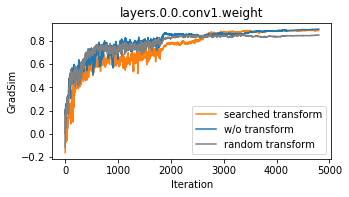

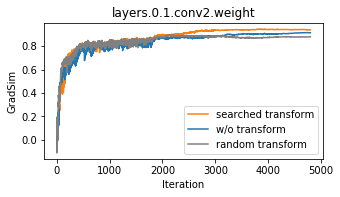

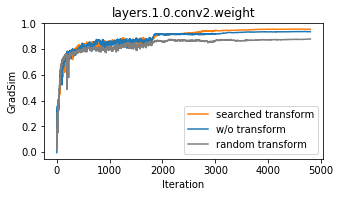

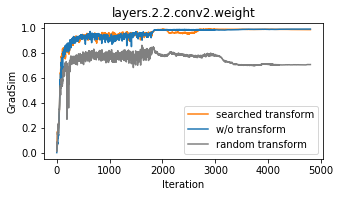

In [23]:
grad_sims = np.load('training/figure_6_43.npy', allow_pickle=True)
grad_sims_no_transform = np.load('training/figure_6_no_transform.npy', allow_pickle=True)
grad_sims_random = np.load('training/figure_6_random.npy', allow_pickle=True)

plt.plot(grad_sims[:,0], color='C1', label='searched transform')
plt.plot(grad_sims_no_transform[:,0], color='C0', label='w/o transform')
plt.plot(grad_sims_random[:,0], color='gray', label='random transform')
plt.xlabel("Iteration")
plt.ylabel("GradSim")
plt.legend()
plt.title('layers.0.0.conv1.weight')
plt.show()
plt.plot(grad_sims[:,1], color='C1', label='searched transform')
plt.plot(grad_sims_no_transform[:,1], color='C0', label='w/o transform')
plt.plot(grad_sims_random[:,1], color='gray', label='random transform')
plt.xlabel("Iteration")
plt.ylabel("GradSim")
plt.legend()
plt.title('layers.0.1.conv2.weight')
plt.show()
plt.plot(grad_sims[:,2], color='C1', label='searched transform')
plt.plot(grad_sims_no_transform[:,2], color='C0', label='w/o transform')
plt.plot(grad_sims_random[:,2], color='gray', label='random transform')
plt.xlabel("Iteration")
plt.ylabel("GradSim")
plt.legend()
plt.title('layers.1.0.conv2.weight')
plt.show()
plt.plot(grad_sims[:,3], color='C1', label='searched transform')
plt.plot(grad_sims_no_transform[:,3], color='C0', label='w/o transform')
plt.plot(grad_sims_random[:,3], color='gray', label='random transform')
plt.xlabel("Iteration")
plt.ylabel("GradSim")
plt.legend()
plt.title('layers.2.2.conv2.weight')
plt.show()